In [17]:
import pandas as pd
import seaborn as sns

In [18]:
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [19]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Question 1 - Demographic

#### a. Most popular demographics with telco brand

In [23]:
# Gender
count_gender = churn_data.groupby(["gender"]).size().reset_index(name="count")
count_gender

,gender,count
0,Female,3488
1,Male,3555


In [24]:
# Senior Citizen
count_citizen = churn_data.groupby(["SeniorCitizen"]).size().reset_index(name="count")
count_citizen

,SeniorCitizen,count
0,0,5901
1,1,1142


In [26]:
# Partner 
count_partner = churn_data.groupby(["Partner"]).size().reset_index(name="count")
count_partner

,Partner,count
0,No,3641
1,Yes,3402


In [28]:
# Dependents
count_dependents = churn_data.groupby(["Dependents"]).size().reset_index(name="count")
count_dependents

,Dependents,count
0,No,4933
1,Yes,2110


Answer: Most popular demographics 
1. Non-Senior Citizens
2. Those without dependents

#### b. Advertisement target

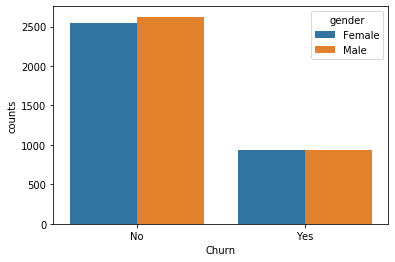

In [20]:
# gender
demographic = churn_data.groupby(['gender','Churn']).size().reset_index(name='counts')
sns.barplot(x='Churn',y='counts',hue='gender', data=demographic)

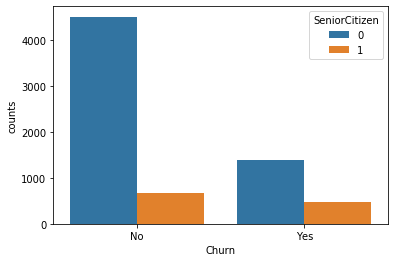

In [21]:
# SeniorCitizen
demographic2 = churn_data.groupby(['SeniorCitizen','Churn']).size().reset_index(name='counts')
sns.barplot(x='Churn',y='counts',hue='SeniorCitizen', data=demographic2)

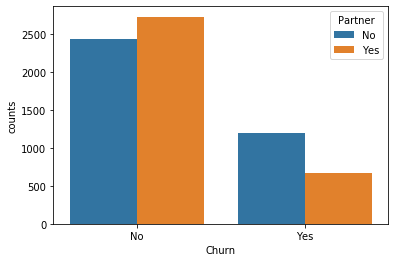

In [16]:
# Partner
demographic3 = churn_data.groupby(['Partner','Churn']).size().reset_index(name='counts')
sns.barplot(x='Churn',y='counts',hue='Partner', data=demographic3)

Answer: Marketing team should target, 
   1. Non-Senior Citizens as they churned more compared to Senior Citizens.   
   2. Those without partners.  


In [7]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Question 2 - Services


In [33]:
df = churn_data[(churn_data['Churn'] == "Yes")]
sorted_df = df.sort_values(by=['MonthlyCharges'], ascending=False)
sorted_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5127,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.8,Yes
4875,2302-ANTDP,Female,1,Yes,No,48,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,117.45,5438.9,Yes
6289,9053-JZFKV,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),116.20,7752.3,Yes
6537,1444-VVSGW,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),115.65,7968.85,Yes


In [ ]:
# Services contributing to higher monthly charges and consequently leading to customer churn 
1. Phone service.  
2. MultipleLines.  
3. Fiber optic.  

b. Contracts that would encourage customer retention.  


In [35]:
contracts = churn_data[(churn_data['PhoneService'] == "Yes") & (churn_data['Churn'] == "No" )]
contracts = contracts.groupby(['Contract']).size().reset_index(name='counts')
contracts

,Contract,counts
0,Month-to-month,1997
1,One year,1176
2,Two year,1489


answer: 
    Month-to-month contract would encourage customer retention. 
    

## Payments